In [ ]:
"""
Experiment 1
LABELS=>
  DDoS : 1
BENIGN : 0

"""

In [ ]:
"""
Experiment 1.1
without Feature Selection

"""

In [ ]:
# Reading CSV file
# Library used : pandas

In [1]:
import pandas as pd

In [2]:
DDoS_Benign_dataset = pd.read_csv("E:/Ankit files/IoT23_thesis/Preprocess_BinaryFiles/CROSS DATASET/cse_cic_ids_2018_encoded_train.csv")

In [ ]:
# Labels and varraiable information in the file displayed

In [3]:
cnt_types =  DDoS_Benign_dataset['Label'].value_counts()
print(cnt_types)

1    171936
0     72167
Name: Label, dtype: int64


In [4]:
DDoS_Benign_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244103 entries, 0 to 244102
Data columns (total 60 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Duration               244103 non-null  int64  
 1   Total Fwd Packet            244103 non-null  int64  
 2   Total Bwd packets           244103 non-null  int64  
 3   Total Length of Fwd Packet  244103 non-null  int64  
 4   Total Length of Bwd Packet  244103 non-null  int64  
 5   Fwd Packet Length Max       244103 non-null  int64  
 6   Fwd Packet Length Min       244103 non-null  int64  
 7   Fwd Packet Length Mean      244103 non-null  float64
 8   Fwd Packet Length Std       244103 non-null  float64
 9   Bwd Packet Length Max       244103 non-null  int64  
 10  Bwd Packet Length Min       244103 non-null  int64  
 11  Bwd Packet Length Mean      244103 non-null  float64
 12  Bwd Packet Length Std       244103 non-null  float64
 13  Flow Bytes/s  

In [5]:
DDoS_Benign_dataset.shape

(244103, 60)

In [ ]:
# Accessing independent varriables(Features) and dependent varriables(Labels)

In [7]:
x = DDoS_Benign_dataset.iloc[:, (DDoS_Benign_dataset.columns!='Label')]
y = DDoS_Benign_dataset.iloc[:,-1]

In [ ]:
# Normalization of independent varriables

In [8]:
x_norm = (x-x.mean())/x.std()

In [ ]:
# check for corelation

In [11]:
crr1=x_norm.corr()
crr1.isnull().sum()

Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Min         0
Fwd Packet Length Mean        0
Fwd Packet Length Std         0
Bwd Packet Length Max         0
Bwd Packet Length Min         0
Bwd Packet Length Mean        0
Bwd Packet Length Std         0
Flow Bytes/s                  0
Flow Packets/s                0
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Flow IAT Min                  0
Fwd IAT Total                 0
Fwd IAT Mean                  0
Fwd IAT Std                   0
Fwd IAT Max                   0
Fwd IAT Min                   0
Bwd IAT Total                 0
Bwd IAT Mean                  0
Bwd IAT Std                   0
Bwd IAT Max                   0
Bwd IAT Min                   0
Fwd Header Length             0
Bwd Header Length             0
Fwd Pack

In [ ]:
# check for correlation

In [12]:
sd1 = x_norm.std()
print(sd1[0:10])
print(sd1[10:30])
print(sd1[30:60])
print(sd1[60:70])

Flow Duration                 1.0
Total Fwd Packet              1.0
Total Bwd packets             1.0
Total Length of Fwd Packet    1.0
Total Length of Bwd Packet    1.0
Fwd Packet Length Max         1.0
Fwd Packet Length Min         1.0
Fwd Packet Length Mean        1.0
Fwd Packet Length Std         1.0
Bwd Packet Length Max         1.0
dtype: float64
Bwd Packet Length Min     1.0
Bwd Packet Length Mean    1.0
Bwd Packet Length Std     1.0
Flow Bytes/s              1.0
Flow Packets/s            1.0
Flow IAT Mean             1.0
Flow IAT Std              1.0
Flow IAT Max              1.0
Flow IAT Min              1.0
Fwd IAT Total             1.0
Fwd IAT Mean              1.0
Fwd IAT Std               1.0
Fwd IAT Max               1.0
Fwd IAT Min               1.0
Bwd IAT Total             1.0
Bwd IAT Mean              1.0
Bwd IAT Std               1.0
Bwd IAT Max               1.0
Bwd IAT Min               1.0
Fwd Header Length         1.0
dtype: float64
Bwd Header Length         1.0


In [ ]:
# applying ML Models 

In [ ]:
# Dividing in x_train , x_test , y_train and y_test

In [14]:
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.20
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=test_size, random_state=seed)

In [ ]:
"""
Experiment 1.1.1
LWGB

"""

In [15]:
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import datetime
a = datetime.datetime.now().replace(microsecond=0)
model = LGBMClassifier()
model.fit(x_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
from numpy import mean
from numpy import std
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
import sklearn.metrics as metrics
y_pred = model.predict(x_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

Accuracy: 1.000 (0.000)
Accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14340
           1       1.00      1.00      1.00     34481

    accuracy                           1.00     48821
   macro avg       1.00      1.00      1.00     48821
weighted avg       1.00      1.00      1.00     48821

0:00:21


In [ ]:
"""
Experiment 1.1.2
XGBoost

"""

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import datetime
import sklearn.metrics as metrics

first_time = datetime.datetime.now()
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
from numpy import mean
from numpy import std
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
later_time = datetime.datetime.now()
difference = later_time -  first_time
print(difference)

D:\SOFTWARES\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:16:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.9999795170111223
Accuracy: 1.000 (0.000)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14340
           1       1.00      1.00      1.00     34481

    accuracy                           1.00     48821
   macro avg       1.00      1.00      1.00     48821
weighted avg       1.00      1.00      1.00     48821

0:01:33.046652


In [ ]:
"""
Experiment 1.1.3
DeepForest

"""

In [17]:
import numpy
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
y_test=y_test.values

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import datetime
import sklearn.metrics as metrics


from deepforest import CascadeForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
first_time = datetime.datetime.now()
model = CascadeForestClassifier( )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,  y_pred) * 100
print("\nTesting Accuracy: {:.3f} %".format(acc))
later_time = datetime.datetime.now()
difference = later_time - first_time
print(difference)

[2021-11-29 05:48:26.686] Start to fit the model:
[2021-11-29 05:48:26.686] Fitting cascade layer = 0 
[2021-11-29 05:49:40.606] layer = 0  | Val Acc = 99.999 % | Elapsed = 73.919 s
[2021-11-29 05:49:40.850] Fitting cascade layer = 1 
[2021-11-29 05:50:20.646] layer = 1  | Val Acc = 100.000 % | Elapsed = 39.796 s
[2021-11-29 05:50:20.652] Early stopping counter: 1 out of 2
[2021-11-29 05:50:20.845] Fitting cascade layer = 2 
[2021-11-29 05:50:58.245] layer = 2  | Val Acc = 99.999 % | Elapsed = 37.400 s
[2021-11-29 05:50:58.246] Early stopping counter: 2 out of 2
[2021-11-29 05:50:58.246] Handling early stopping
[2021-11-29 05:50:58.249] The optimal number of layers: 1
[2021-11-29 05:50:58.260] Start to evalute the model:
[2021-11-29 05:50:58.429] Evaluating cascade layer = 0 

Testing Accuracy: 100.000 %
0:02:35.191002


In [20]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
from numpy import mean
from numpy import std
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

c_r = classification_report(y_test, y_pred)
c_m = confusion_matrix(y_test, y_pred)
print(c_r)
print(c_m)

Accuracy: 1.000 (0.000)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14340
           1       1.00      1.00      1.00     34481

    accuracy                           1.00     48821
   macro avg       1.00      1.00      1.00     48821
weighted avg       1.00      1.00      1.00     48821

[[14340     0]
 [    0 34481]]


In [ ]:
# Heat Maps

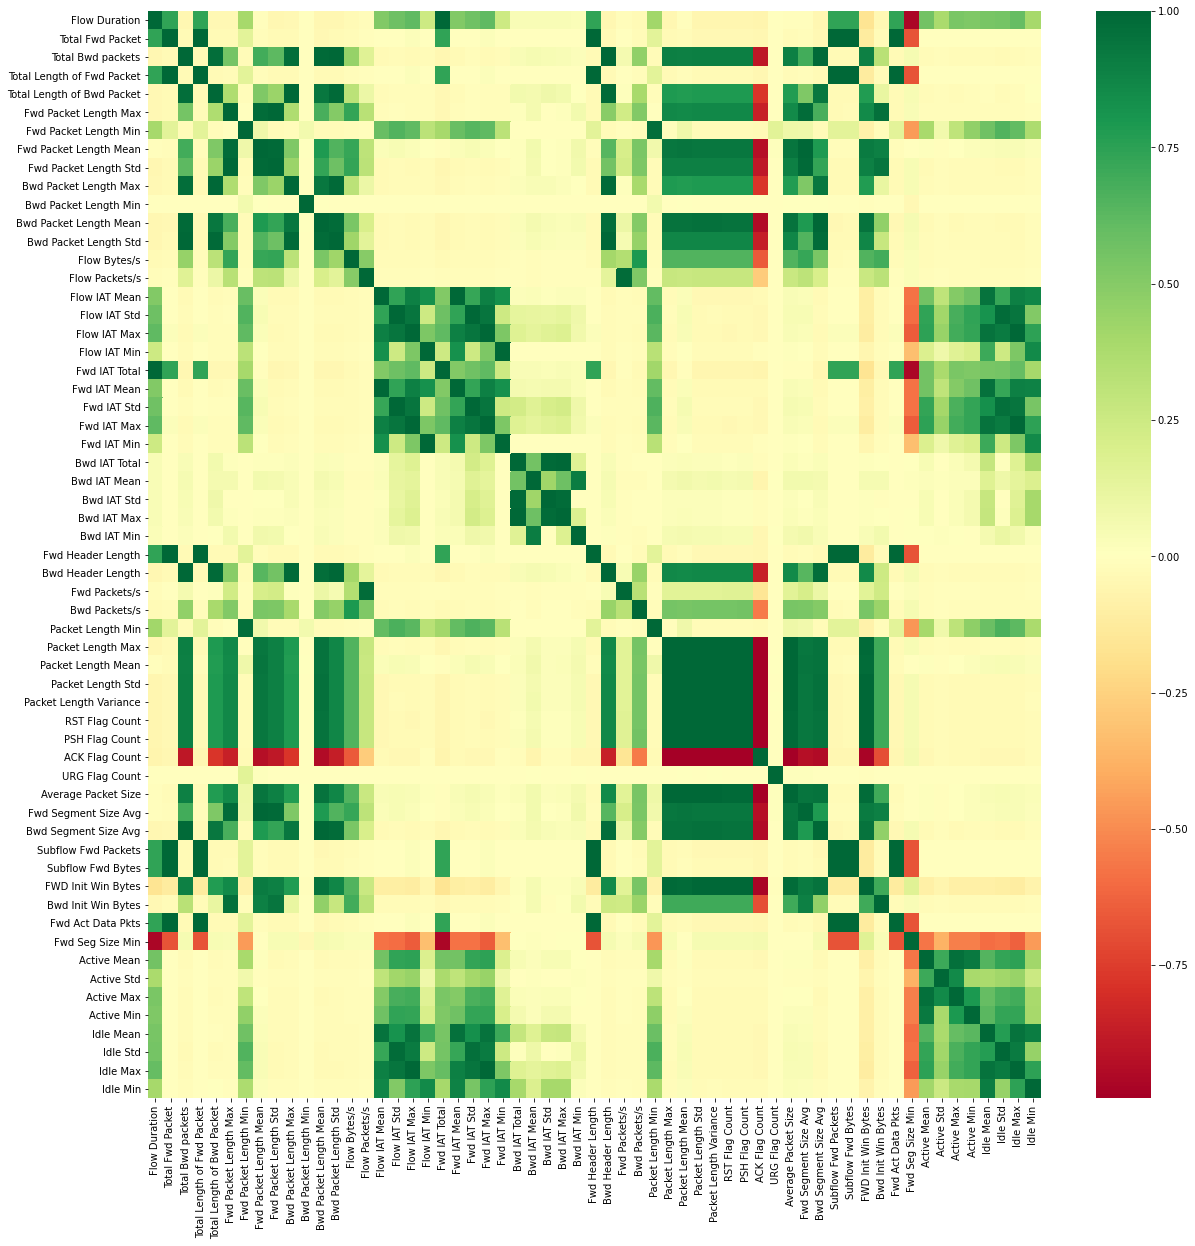

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = x_norm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x_norm[top_corr_features].corr(),annot=False,cmap="RdYlGn")